<a href="https://colab.research.google.com/github/myjjojjojjo/Lesson/blob/main/%EC%97%B0%EC%8A%B5_2%ED%9A%8C%EA%B8%B0%EC%B6%9C_kfold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import time

In [141]:
from sklearn.metrics import RocCurveDisplay

In [155]:
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('/content/diabetes_for_test.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<BarContainer object of 2 artists>

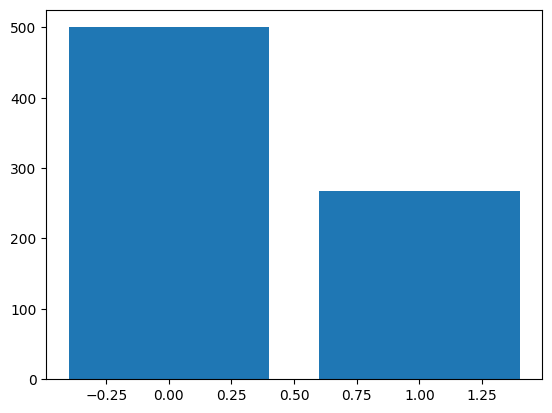

In [6]:
plt.bar(df['Outcome'].value_counts().index,df['Outcome'].value_counts().values)

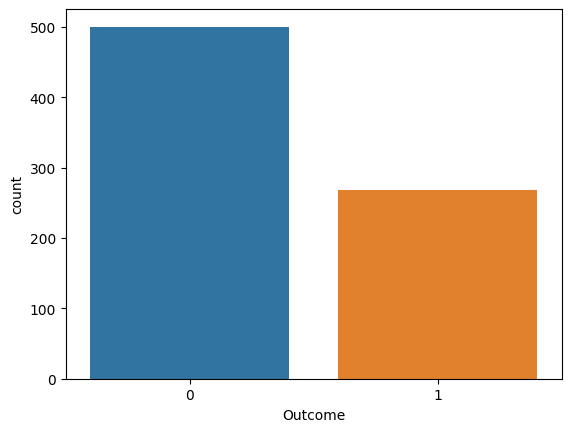

In [14]:
sns.countplot(x='Outcome',data=df)
plt.show()

<Axes: >

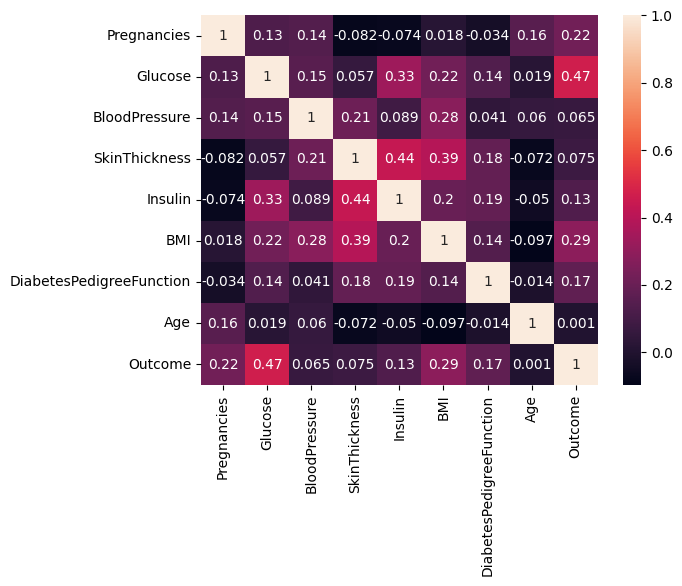

In [15]:
sns.heatmap(df.corr(method='pearson'),annot=True)

Text(0.5, 0.98, 'EDA')

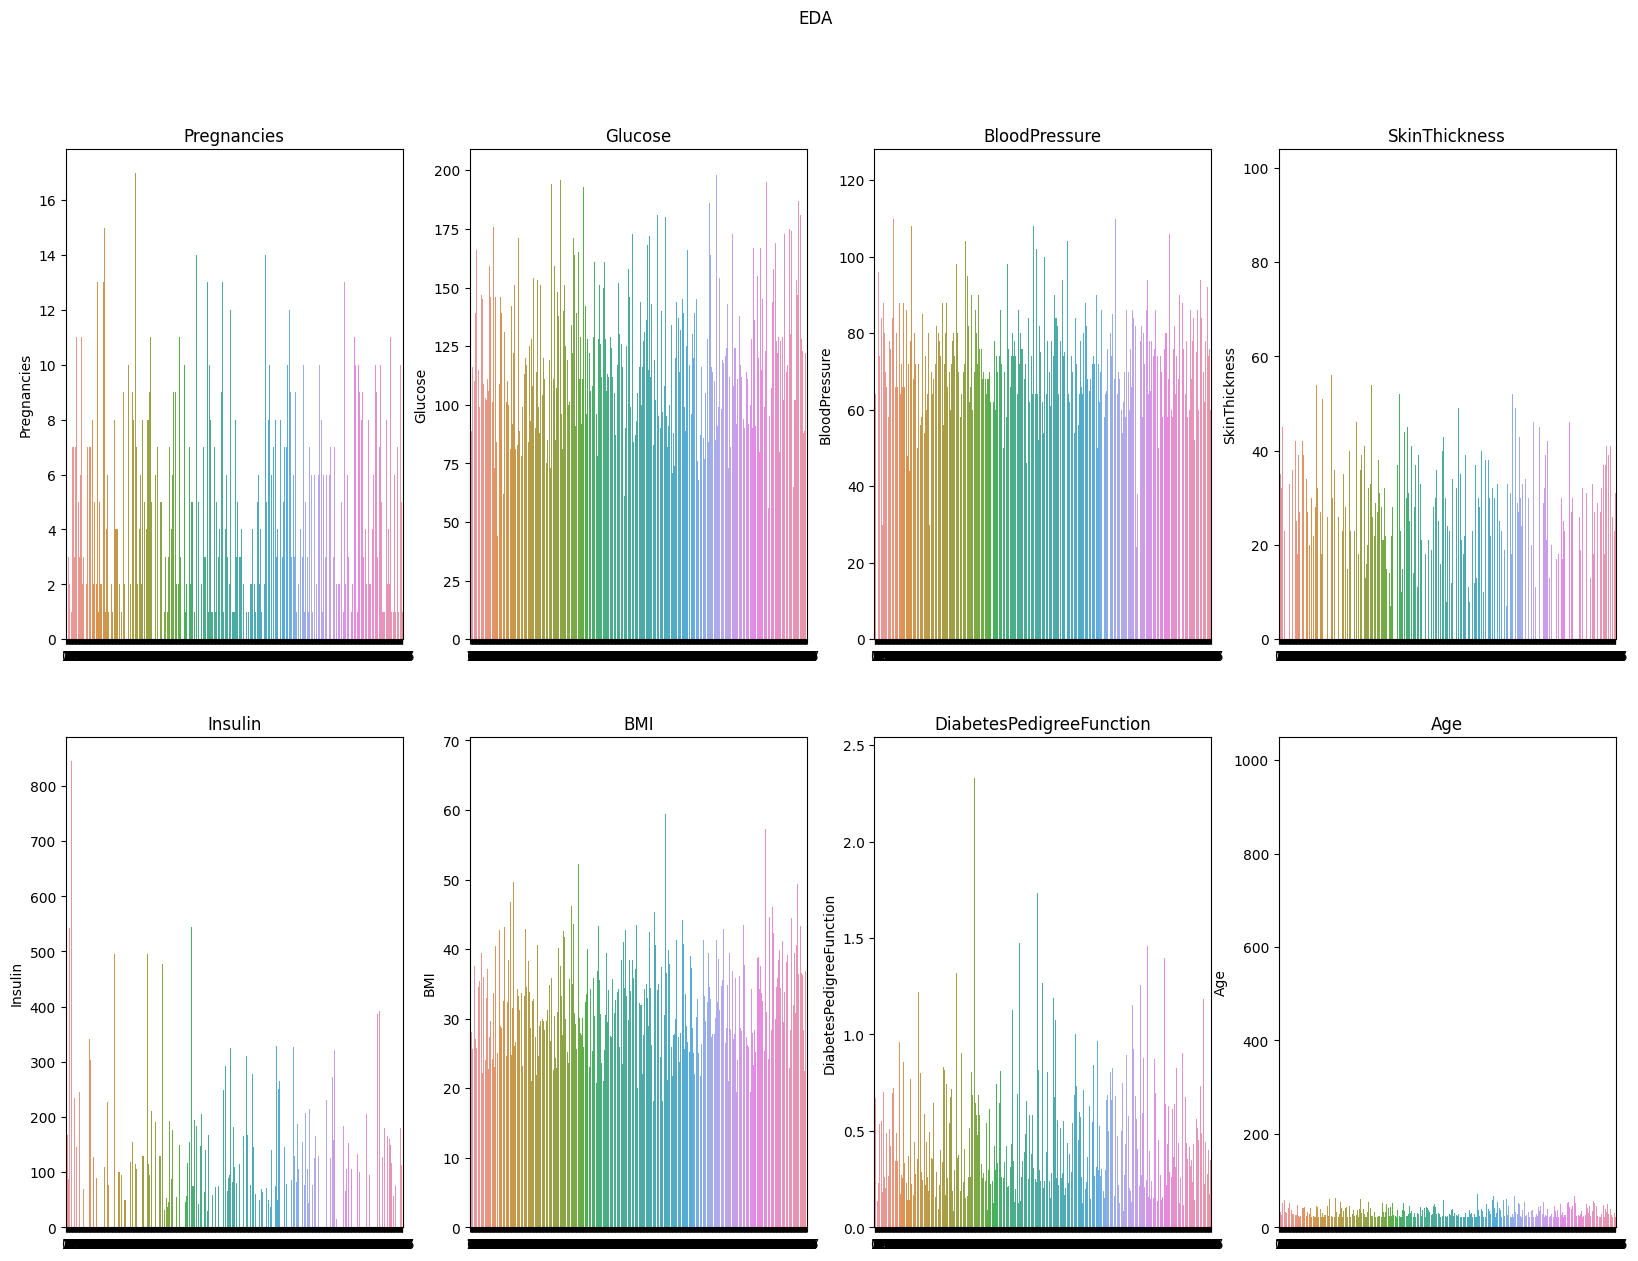

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
for i in range(4) :
    sns.barplot(x=df.index,y=df.iloc[:,i], ax = axes[0][i] )
    axes[0][i].set_title(df.columns[i])
for i in range(4) :
    sns.barplot(x=df.index,y=df.iloc[:,i+4], ax = axes[1][i])
    axes[1][i].set_title(df.columns[i+4])

plt.suptitle("EDA")

Text(0.5, 0.98, 'EDA')

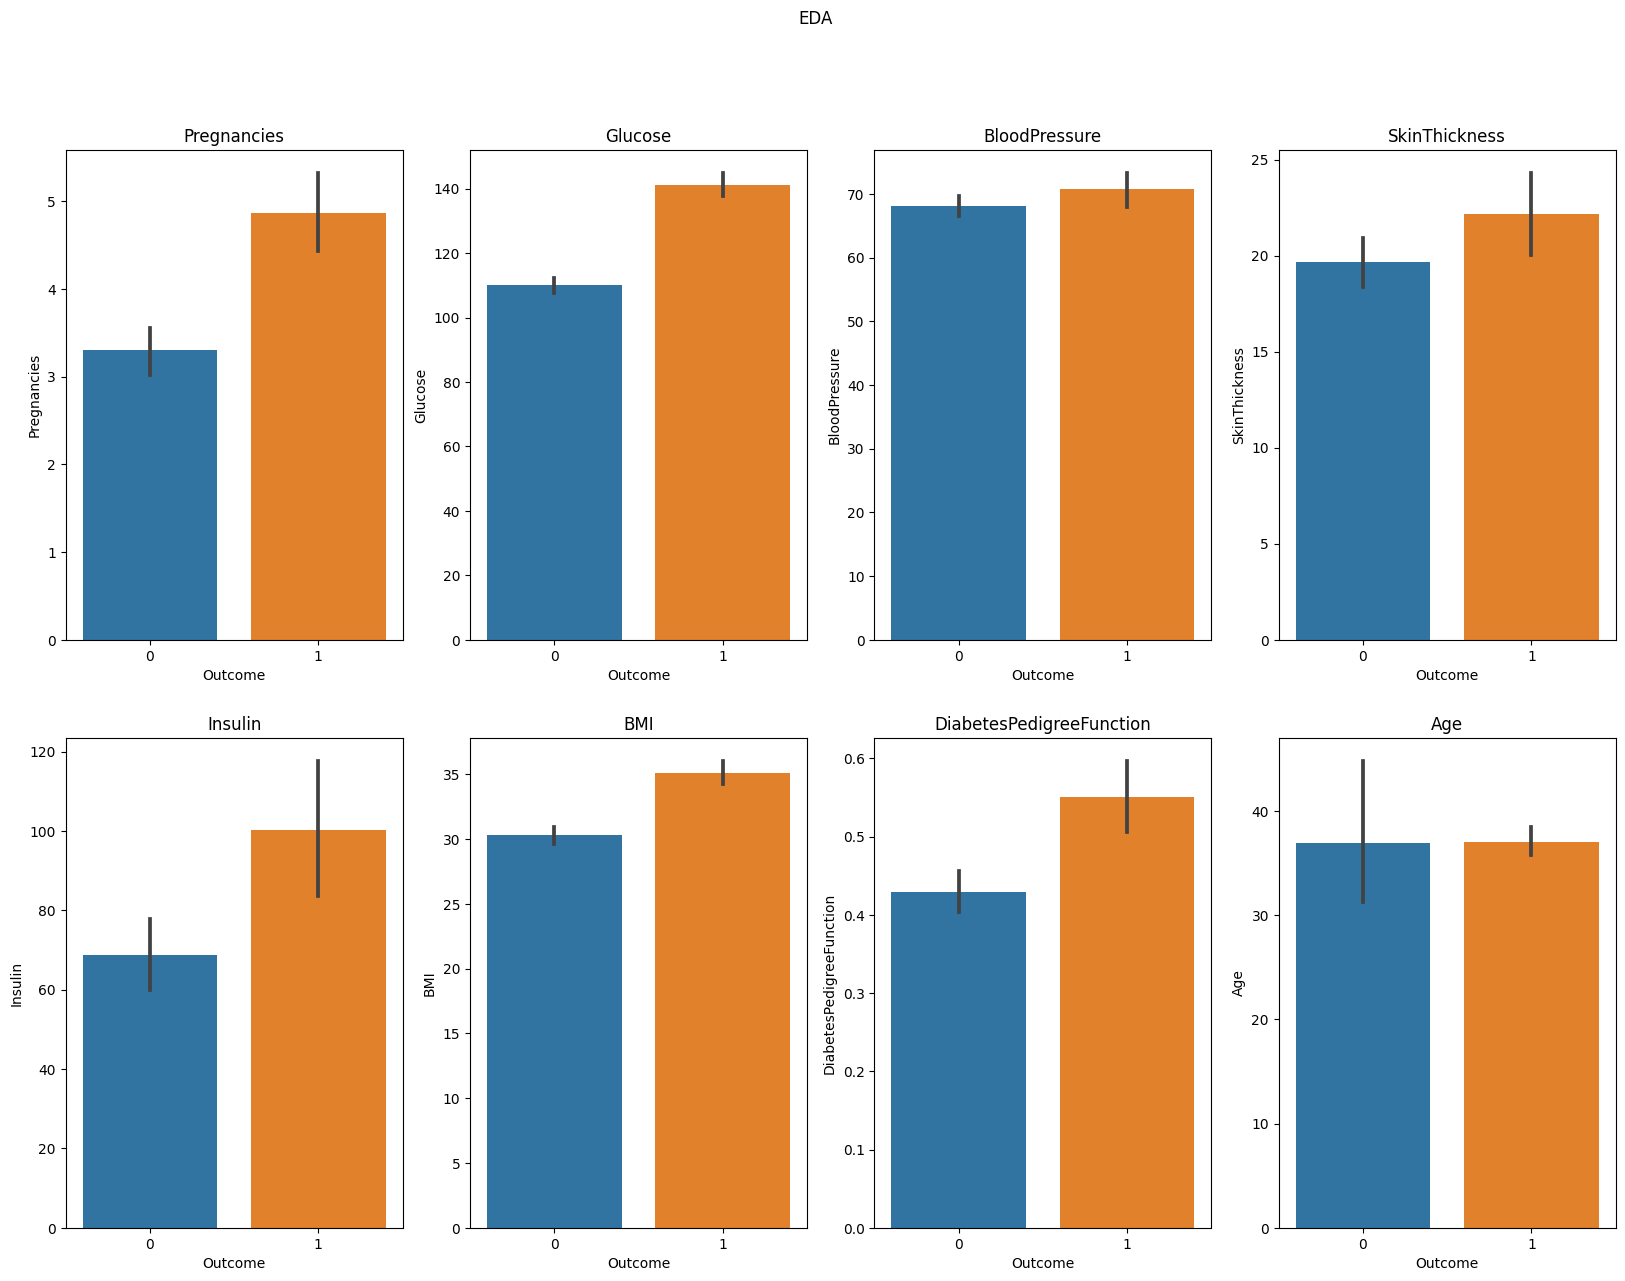

In [21]:
fig, axes = plt.subplots(2, 4, figsize=(20, 14))
for i in range(4) :
    sns.barplot(x=df.Outcome,y=df.iloc[:,i], ax = axes[0][i] )
    axes[0][i].set_title(df.columns[i])
for i in range(4) :
    sns.barplot(x=df.Outcome,y=df.iloc[:,i+4], ax = axes[1][i])
    axes[1][i].set_title(df.columns[i+4])

plt.suptitle("EDA")

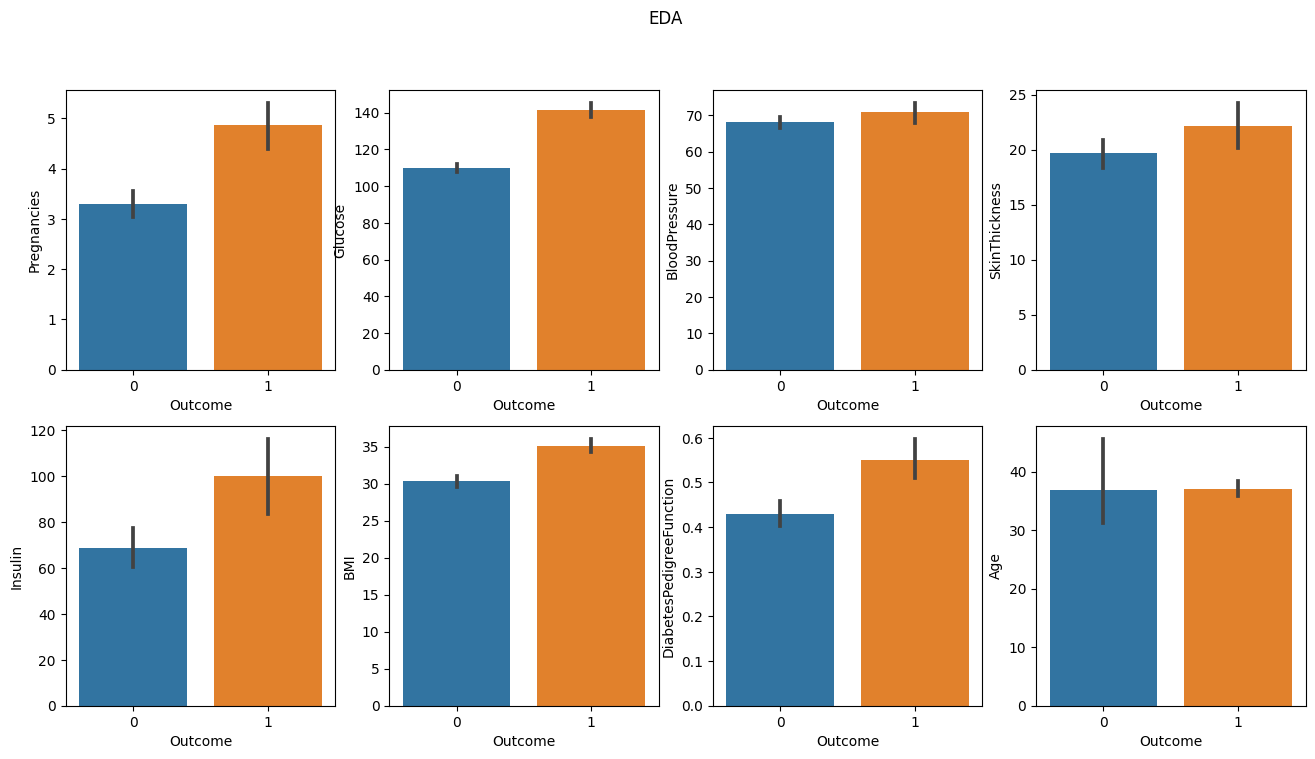

In [19]:
fig,axes=plt.subplots(2,4,figsize=(16,8))
sns.barplot(data=df,x=df.Outcome,y=df.Pregnancies,ax=axes[0][0])
sns.barplot(data=df,x=df.Outcome,y=df.Glucose,ax=axes[0][1])
sns.barplot(data=df,x=df.Outcome,y=df.BloodPressure,ax=axes[0][2])
sns.barplot(data=df,x=df.Outcome,y=df.SkinThickness,ax=axes[0][3])
sns.barplot(data=df,x=df.Outcome,y=df.Insulin,ax=axes[1][0])
sns.barplot(data=df,x=df.Outcome,y=df.BMI,ax=axes[1][1])
sns.barplot(data=df,x=df.Outcome,y=df.DiabetesPedigreeFunction,ax=axes[1][2])
sns.barplot(data=df,x=df.Outcome,y=df.Age,ax=axes[1][3])
plt.suptitle('EDA')
plt.show()

In [ ]:
당뇨병이 있는 사람은 없는 사람보다 pregnancies의 평균 수치가 높다.

당뇨병이 있는 사람은 없는 사람 보다 Glucose의 평균 수치가 높다.

당뇨병이 있는 사람은 없는 사람 보다 Insulin의 평균 수치가 높다.

당뇨병이 있는 사람은 없는 사람 보다 BMI의 평균 수치가 높다.

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,36.980469,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,61.404453,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,999.000000,1.000000


In [119]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [26]:
melt_df=pd.melt(x,var_name='col',value_name='value')
melt_df

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


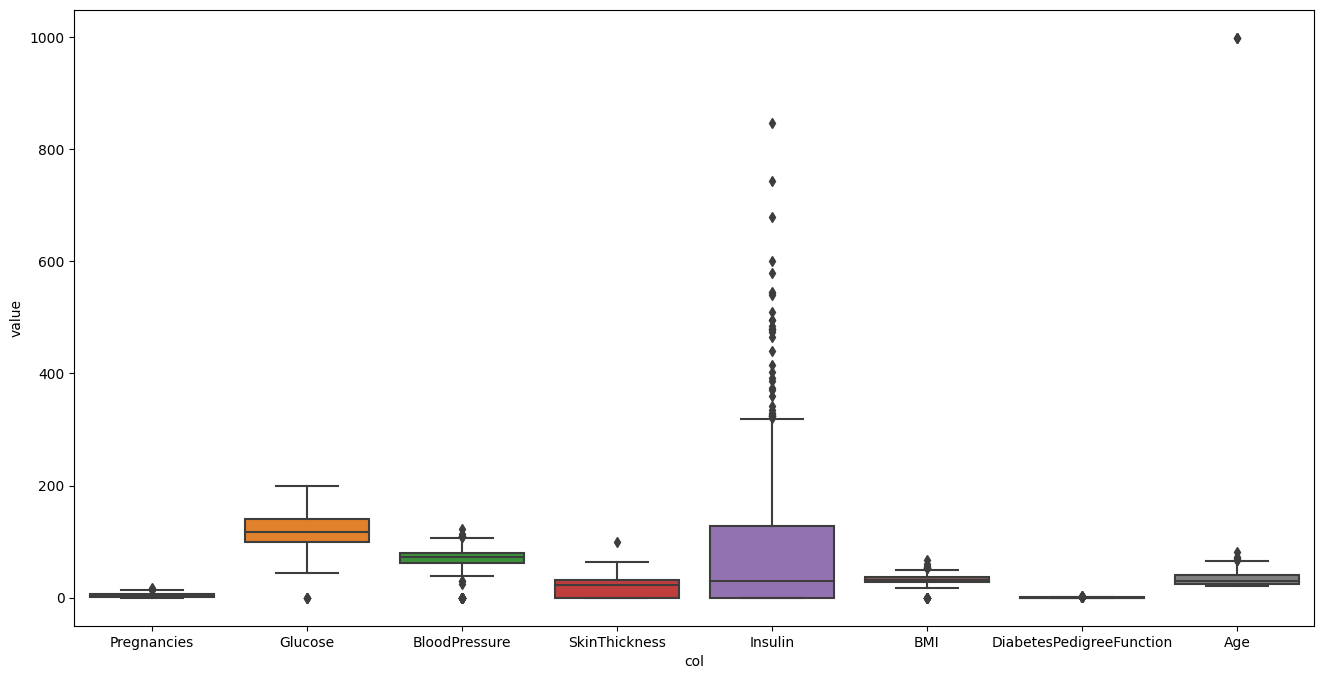

In [28]:
plt.figure(figsize=(16,8))
sns.boxplot(melt_df,x='col',y='value')
plt.show()

In [54]:
age_outlier_index=df[df.Age>200].index
age_outlier_index

Int64Index([], dtype='int64')

In [55]:
df.loc[age_outlier_index,'Age']=df.Age.mean()
df.loc[age_outlier_index,'Age']

Series([], Name: Age, dtype: float64)

In [56]:
df.loc[559,'Age']


36.98046875

In [41]:
bp_outlier_index=df[df.BloodPressure==0].index
df.loc[bp_outlier_index,'BloodPressure']=df.BloodPressure.mean()
df.loc[bp_outlier_index,'BloodPressure']

7      69.105469
15     69.105469
49     69.105469
60     69.105469
78     69.105469
81     69.105469
172    69.105469
193    69.105469
222    69.105469
261    69.105469
266    69.105469
269    69.105469
300    69.105469
332    69.105469
336    69.105469
347    69.105469
357    69.105469
426    69.105469
430    69.105469
435    69.105469
453    69.105469
468    69.105469
484    69.105469
494    69.105469
522    69.105469
533    69.105469
535    69.105469
589    69.105469
601    69.105469
604    69.105469
619    69.105469
643    69.105469
697    69.105469
703    69.105469
706    69.105469
Name: BloodPressure, dtype: float64

In [42]:
skin_outlier_index=df[df.SkinThickness==0].index
df.loc[skin_outlier_index,'SkinThickness']=df.SkinThickness.mean()
df.loc[skin_outlier_index,'SkinThickness']

2      20.536458
5      20.536458
7      20.536458
9      20.536458
10     20.536458
         ...    
757    20.536458
758    20.536458
759    20.536458
762    20.536458
766    20.536458
Name: SkinThickness, Length: 227, dtype: float64

In [51]:
df.loc[2,'SkinThickness']

20.536458333333332

In [43]:
insulin_outlier_index=df[df.Insulin==0].index
df.loc[insulin_outlier_index,'Insulin']=df.Insulin.mean()
df.loc[insulin_outlier_index,'Insulin']

0      79.799479
1      79.799479
2      79.799479
5      79.799479
7      79.799479
         ...    
761    79.799479
762    79.799479
764    79.799479
766    79.799479
767    79.799479
Name: Insulin, Length: 374, dtype: float64

In [58]:
melt_df=pd.melt(x,var_name='col',value_name='value')
melt_df

,col,value
0,Pregnancies,6.0
1,Pregnancies,1.0
2,Pregnancies,8.0
3,Pregnancies,1.0
4,Pregnancies,0.0
...,...,...
6139,Age,63.0
6140,Age,27.0
6141,Age,30.0
6142,Age,47.0


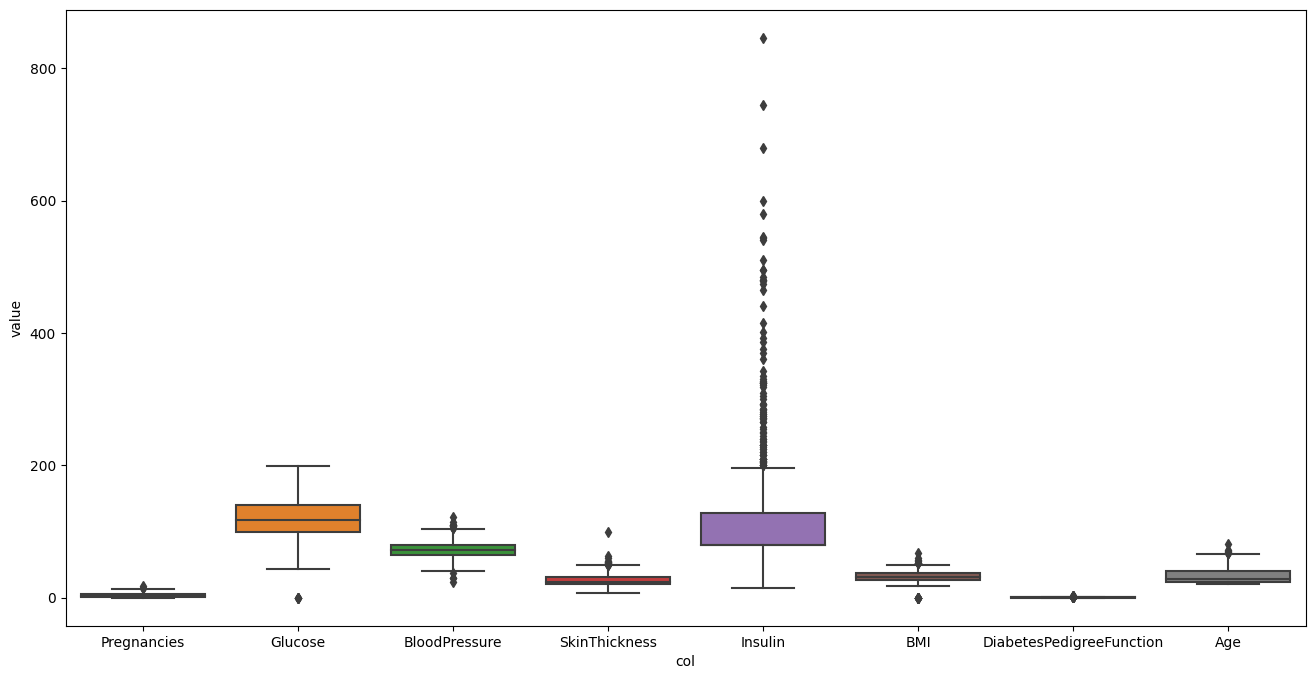

In [59]:
plt.figure(figsize=(16,8))
sns.boxplot(melt_df,x='col',y='value')
plt.show()

In [ ]:
# 이상치 왜 안 없어지지?
# 작업 후 x=df.drop(columns='Outcome')  y=df['Outcome']를 다시 실행해주어야 한다.

In [76]:
df.Outcome.value_counts()/len(df)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [147]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [158]:
ro=RandomOverSampler()
ro_x,ro_y=ro.fit_resample(x,y)

In [159]:
ro_y.value_counts()/len(ro_y)

1    0.5
0    0.5
Name: Outcome, dtype: float64

In [78]:
kfold=KFold(n_splits=5)
#과적합의 방지를 위해 교차 검증이 필요합니다!

KFold에는 약간의 문제점이 존재하는데, 먼저 KFold 는 데이터셋을 일정한 간격으로 쪼갭니다.

가령 iris data set을 보면, 레이블이 0,1,2 세개가 존재하고 레이블 0인 데이터셋 50개, 1인 데이터셋 50개, 2인 데이터셋 50개의 순서로 이루어져있죠.  iris data set을 data frame으로 나타내보았습니다.  분류한 폴드세트에서 학습 데이터셋의 레이블이 0, 1로만 이루어져있다면 데이터셋의 레이블이 2인 데이터는 올바르게 분류해낼 수 없습니다.

이렇게 KFold는 데이터 편향이 존재하는 경우, 제대로된 모델 학습과 검증이 이루어지지 않을 수 있습니다.


이를 해결할 수 있는 방법에는 다양한 방법들이 있지만, 먼저 간단하게 KFold 메서드 내에서 매개변수 suffle을 True로 설정해줄 수 있습니다.  데이터셋을 섞어주는 것이죠.

kfold = KFold(n_splits=3, shuffle=True)

https://dacon.io/codeshare/4546

In [84]:
kfold.split(x)

<generator object _BaseKFold.split at 0x7f0666c2f1b0>

In [102]:
pd.DataFrame(y)

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [118]:
for i ,j in kfold.split(x):
  print(x.iloc[i,0])
  print(x.iloc[j,0])
#for i ,j in kfold.split(y):
  #print(y.iloc[i,0])
  #y.iloc[test_index,:0]

154     8
155     7
156     2
157     1
158     2
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 614, dtype: int64
0      6
1      1
2      8
3      1
4      0
      ..
149    2
150    1
151    4
152    9
153    1
Name: Pregnancies, Length: 154, dtype: int64
0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 614, dtype: int64
154     8
155     7
156     2
157     1
158     2
       ..
303     5
304     3
305     2
306    10
307     0
Name: Pregnancies, Length: 154, dtype: int64
0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 614, dtype: int64
308     0
309     2
310     6
311     0
312     2
       ..
457     5
458    10
459     9
460     9
461     1
Name: Pregnancies, Length: 154, dtype: int64
0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
7

In [124]:
for i ,j in kfold.split(y):  # x를 넣건 y를 넣건 같음
  print(i)
  print(len(i))
  print(i.shape)
  print()
  print(j)
  print(len(j))
  print(j.shape)
  print()

[154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351
 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369
 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387
 388 389 390 391 392 393 394 395 396 397 398 399 40

In [120]:
def ros_model_result(model):
    pred_li =[]
    for train_index,test_index in kfold.split(x):
        x_train,x_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train,y_test = y.iloc[train_index,'Outcome'],y.iloc[test_index,'Outcome']

        ro_x_train,ro_y_train = ros.fit_resample(x_train,y_train)

        start = time.time()
        model.fit(ro_x_train,ro_y_train)
        end = time.time()

        pred = model.predict(x_test)
        pred_li.append(accuracy_score(y_test,pred))

    ## 마지막 데이터 학습 속도
    print(f"{end - start:.5f} sec")
    ## 5개의 train데이터에 대한 정확도의 평균 값
    print(np.mean(pred_li))

In [128]:
len(train_index)

614

In [129]:
y.iloc[train_index,:]  # 뭐가 문제일까?

IndexingError: ignored

In [94]:
rf=RandomForestClassifier()
svc=SVC()
log=LogisticRegression()
xg=XGBClassifier()

In [136]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)

In [142]:
def ros_model_result(model):


  ro_x_train,ro_y_train = ros.fit_resample(x_train,y_train)

  start = time.time()
  model.fit(ro_x_train,ro_y_train)
  end = time.time()

  pred = model.predict(x_test)
  accuracy=accuracy_score(y_test,pred)
  roc=RocCurveDisplay.from_predictions(y_test, pred)


  print(f"{end - start:.5f} sec")
  print(accuracy)
  print(roc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.02272 sec
0.7083333333333334


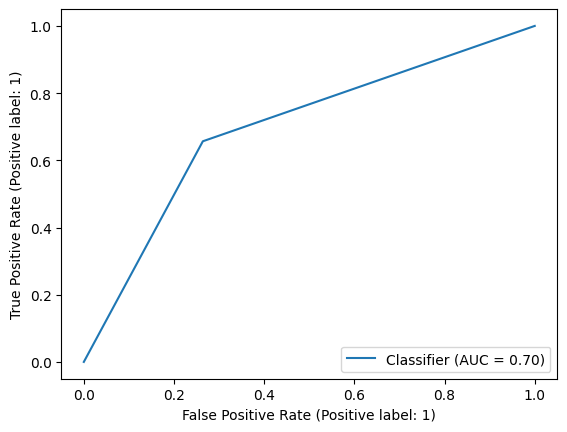

In [143]:
ros_model_result(log)

0.66838 sec
0.7552083333333334


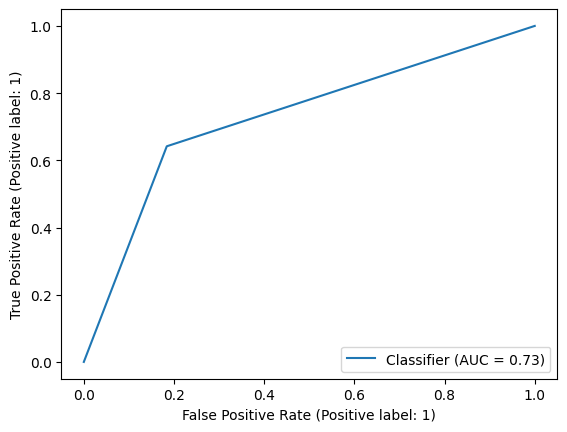

In [144]:
ros_model_result(rf)

1.44239 sec
0.734375


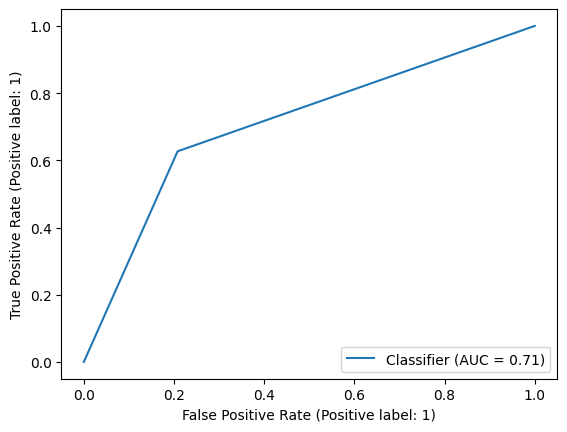

In [145]:
ros_model_result(xg)

0.03243 sec
0.703125


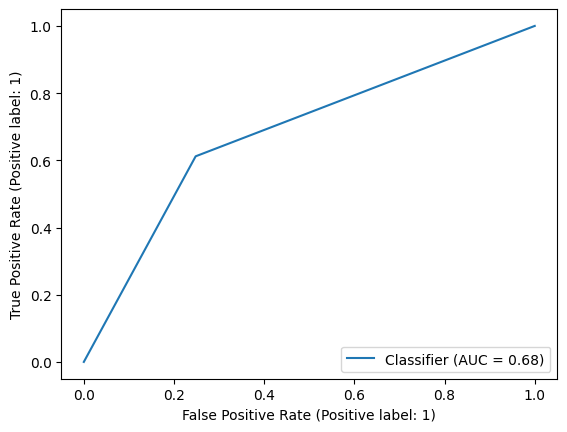

In [146]:
ros_model_result(svc)

In [148]:
sm=SMOTE()

In [149]:
sm_x_train,sm_y_train=sm.fit_resample(x_train,y_train)

In [150]:
def sm_model_result(model):


  sm_x_train,sm_y_train=sm.fit_resample(x_train,y_train)

  start = time.time()
  model.fit(sm_x_train,sm_y_train)
  end = time.time()

  pred = model.predict(x_test)
  accuracy=accuracy_score(y_test,pred)
  roc=RocCurveDisplay.from_predictions(y_test, pred)


  print(f"{end - start:.5f} sec")
  print(accuracy)
  print(roc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.03585 sec
0.7395833333333334


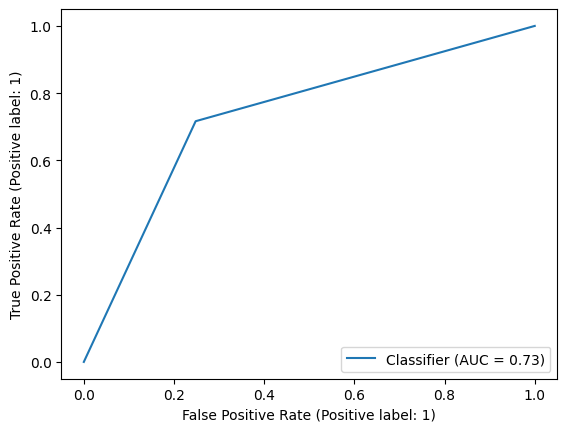

In [151]:
sm_model_result(log)

0.56835 sec
0.7447916666666666


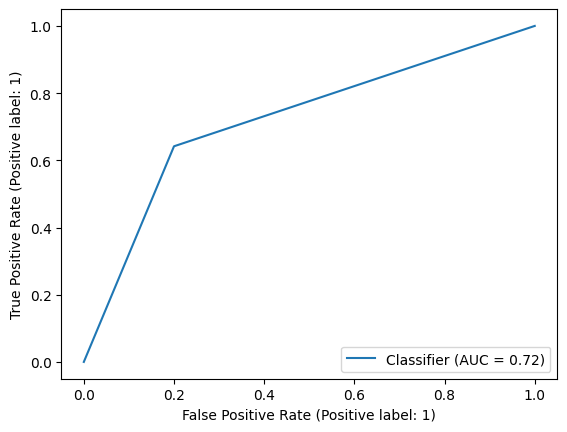

In [152]:
sm_model_result(rf)

3.75347 sec
0.734375


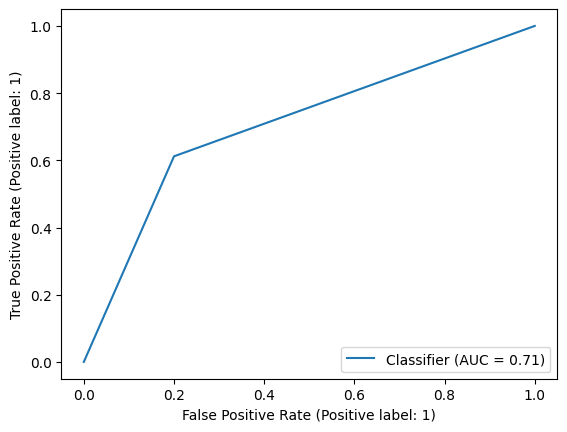

In [153]:
sm_model_result(xg)

0.03706 sec
0.703125


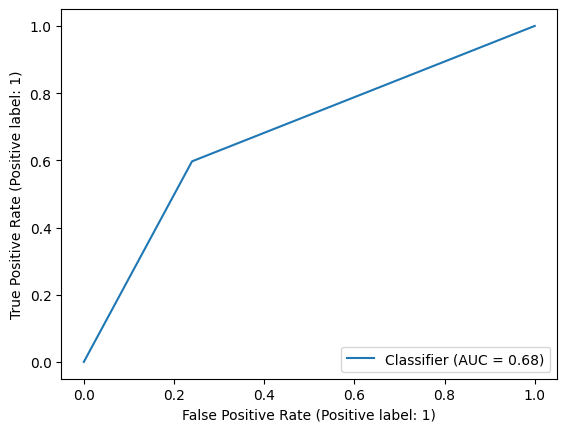

In [154]:
sm_model_result

In [160]:
def pca_ro_model_result(model):

  ro_x_train,ro_y_train=ro.fit_resample(x_train,y_train)

  scaler = StandardScaler()
  scaled_ro_x_train = scaler.fit_transform(ro_x_train) # 스케일은 x 데이터에만
  scaled_x_test = scaler.transform(x_test)  # 오버샘플링 언더샘플링은 train 데이터에만

  pca = PCA(n_components=5)
  pca_x_train = pca.fit_transform(scaled_ro_x_train)  # pca는 x 데이터에만
  pca_x_test = pca.transform(scaled_x_test)

  start = time.time()
  model.fit(pca_x_train,ro_y_train)
  end = time.time()

  pred = model.predict(pca_x_test)
  accuracy= accuracy_score(y_test,pred)
  roc=RocCurveDisplay.from_predictions(y_test,pred)

  print(f"{end - start:.5f} sec")
  print(accuracy)
  print()

0.00463 sec
0.7135416666666666



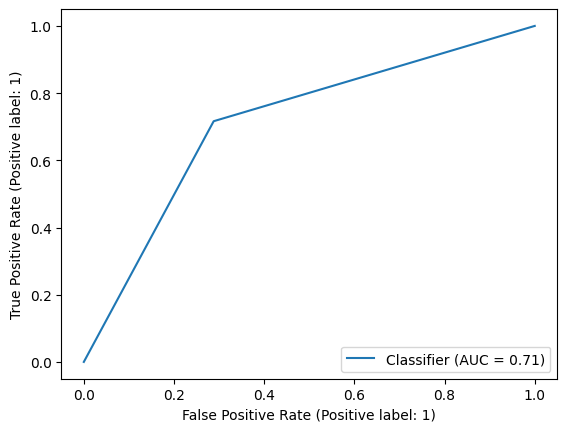

In [161]:
pca_ro_model_result(log)

0.40209 sec
0.7291666666666666



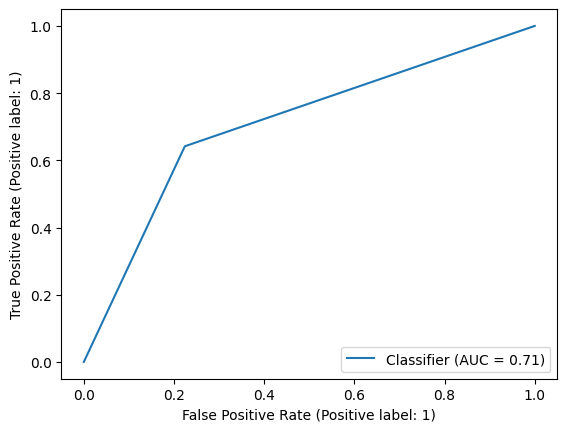

In [162]:
pca_ro_model_result(rf)

1.87166 sec
0.734375



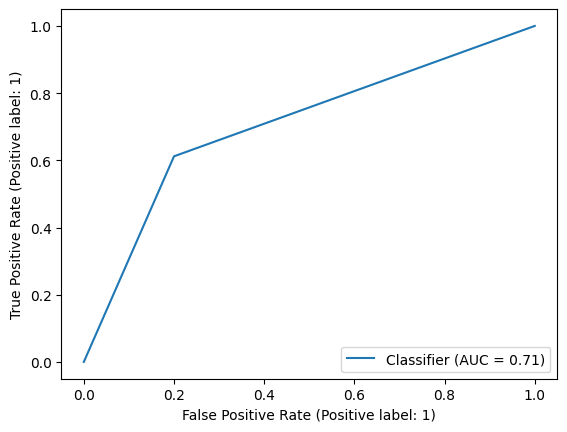

In [163]:
pca_ro_model_result(xg)

0.06000 sec
0.7083333333333334



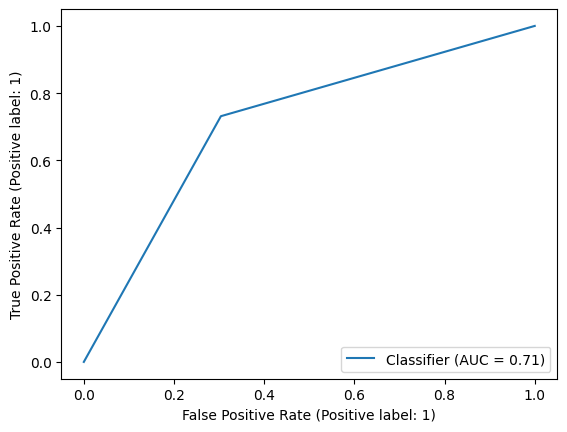

In [164]:
pca_ro_model_result(svc)

In [166]:
def pca_sm_model_result(model):

  sm_x_train,sm_y_train=sm.fit_resample(x_train,y_train)

  scaler = StandardScaler()
  scaled_sm_x_train = scaler.fit_transform(sm_x_train) # 스케일은 x 데이터에만
  scaled_x_test = scaler.transform(x_test)  # 오버샘플링 언더샘플링은 train 데이터에만

  pca = PCA(n_components=5)
  pca_x_train = pca.fit_transform(scaled_sm_x_train)  # pca는 x 데이터에만
  pca_x_test = pca.transform(scaled_x_test)

  start = time.time()
  model.fit(pca_x_train,sm_y_train)
  end = time.time()

  pred = model.predict(pca_x_test)
  accuracy= accuracy_score(y_test,pred)
  roc=RocCurveDisplay.from_predictions(y_test,pred)

  print(f"{end - start:.5f} sec")
  print(accuracy)
  print()

0.00401 sec
0.7135416666666666



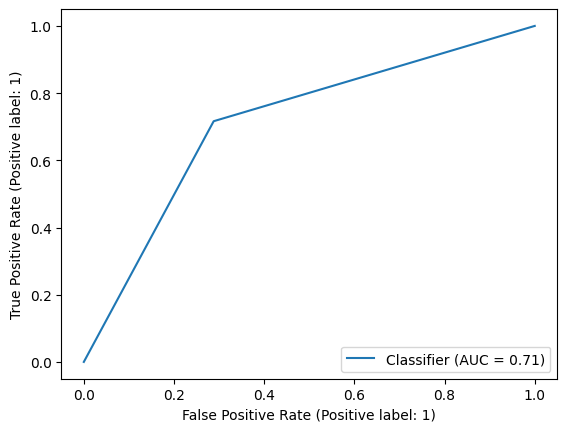

In [167]:
pca_sm_model_result(log)

1.88923 sec
0.6979166666666666



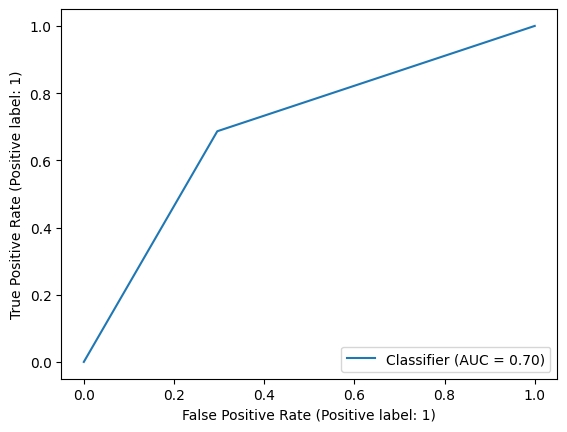

In [168]:
pca_sm_model_result(rf)

2.69862 sec
0.6875



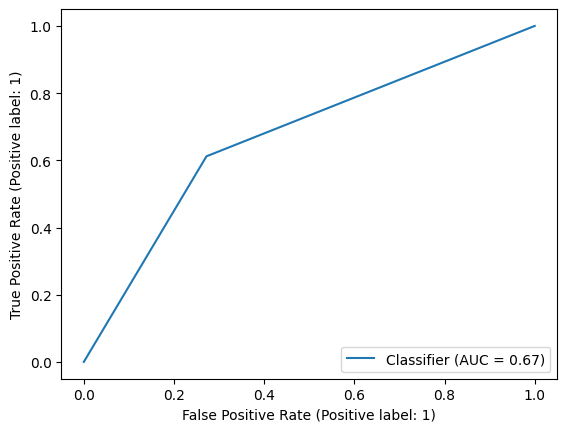

In [169]:
pca_sm_model_result(xg)

0.08717 sec
0.7083333333333334



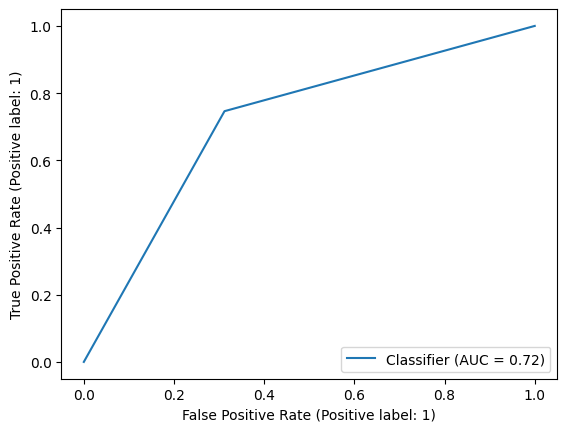

In [170]:
pca_sm_model_result(svc)

In [ ]:
향후에 데이터가 크게 늘어난다면 성능 및 속도 측면에서 더 유의미한 차이가 클 것으로 보인다.